In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
from eden.util import configure_logging
import logging
configure_logging(logging.getLogger(),verbosity=1)

In [2]:
# get data
from eden.converter.graph.gspan import gspan_to_eden
from itertools import islice
def get_graphs(dataset_fname, size=100):
    return  islice(gspan_to_eden(dataset_fname),size)

#dataset_names = !cat NCI60/names
#dataset = dataset_names[3]
#dataset_fname = 'NCI60/' + dataset + '_orig_pos.gspan'
#print 'Working with dataset: %s' % dataset 

dataset_fname = 'toolsdata/bursi.pos.gspan'



#supercool color profile
def colorize_by_type(g,label='mycolors'):
    for n,d in g.nodes(data=True):
        if 'interface' not in d:
            d[label]='#C88A68' #r
        elif 'interface' in d:
            d[label]='#FAF4B0' #y 
        elif 'SHOULDONOTHAPPEN' in d:
            d[label]='#C9BC24' #dark y
        else:
            d[label]='#C1DDEB' #b


We work on this graph
no filter
with filter: nothing should appear,,,
with filter but we chose node 2 as root
with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up


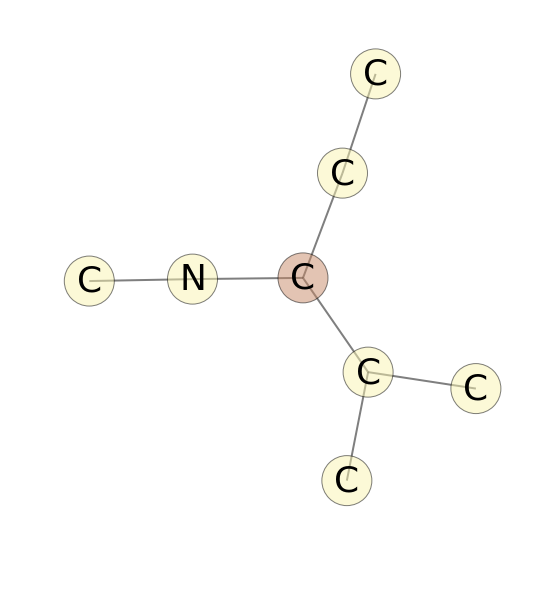

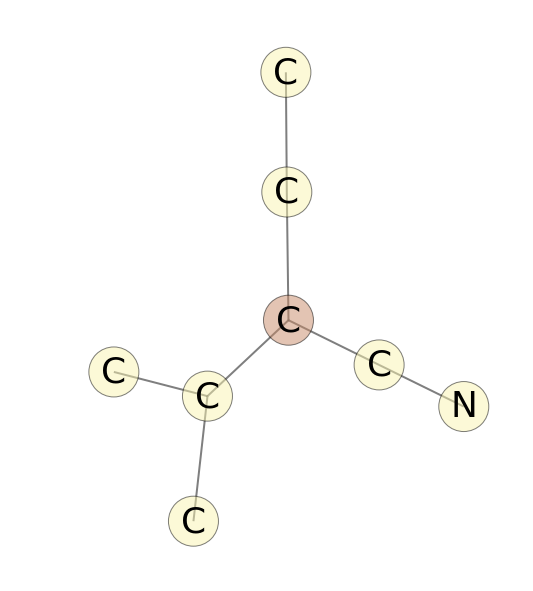

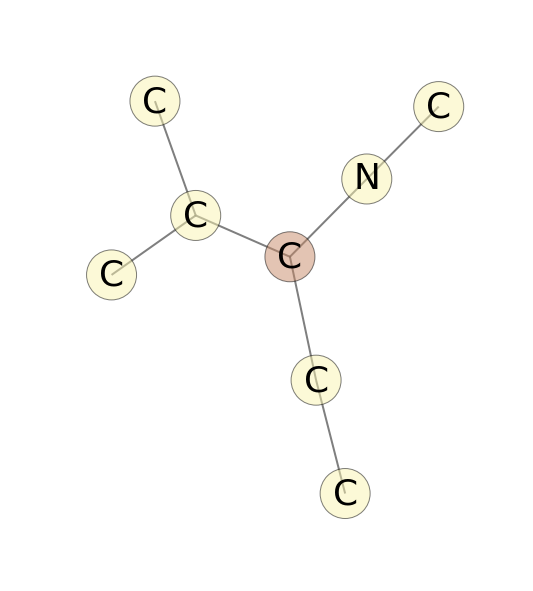

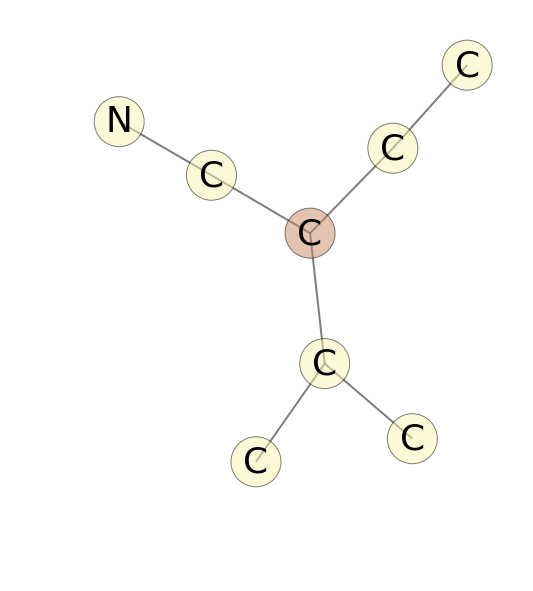

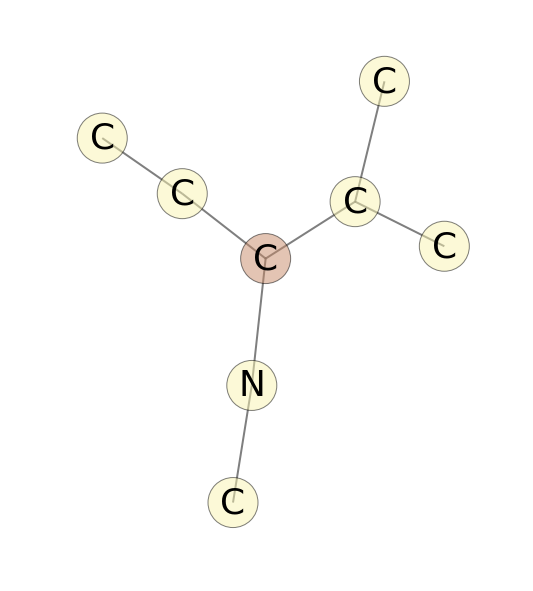

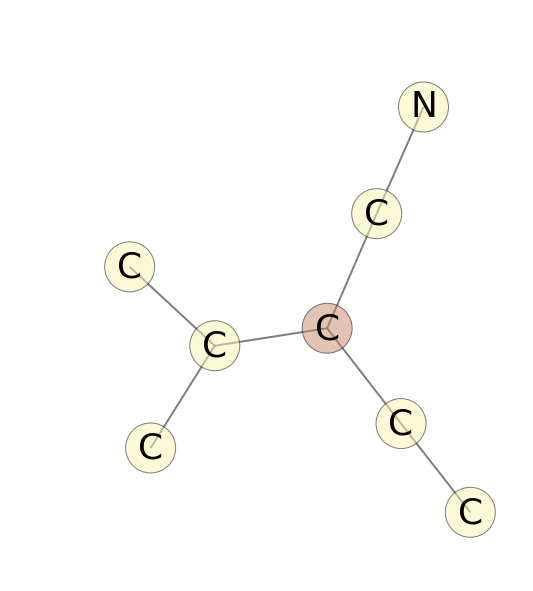

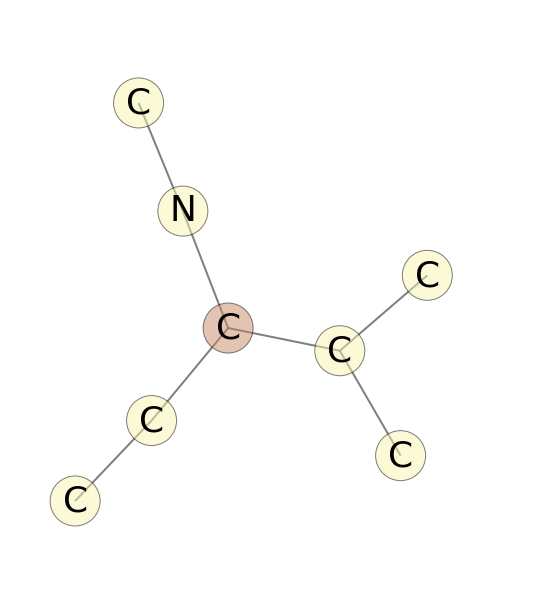

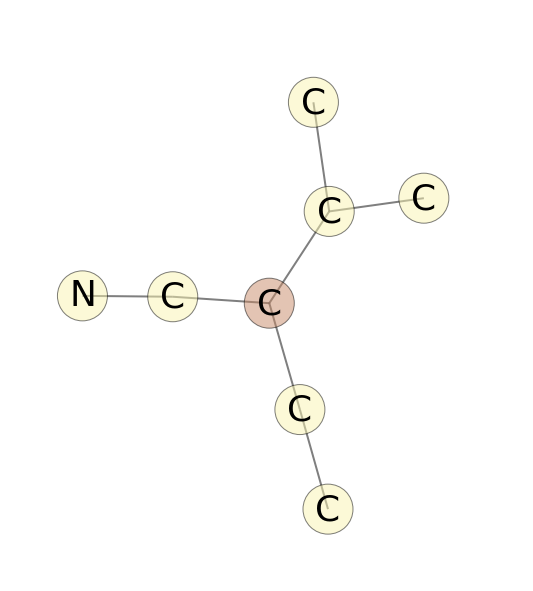

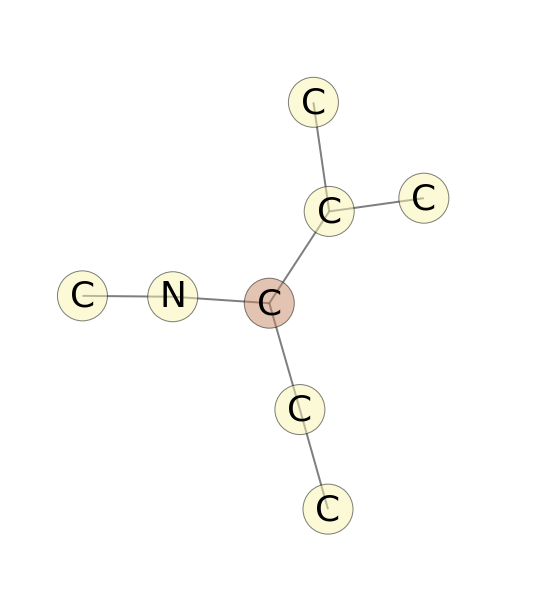

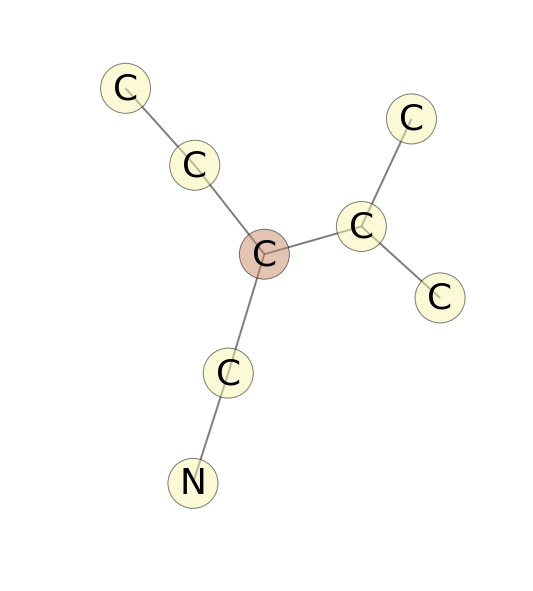

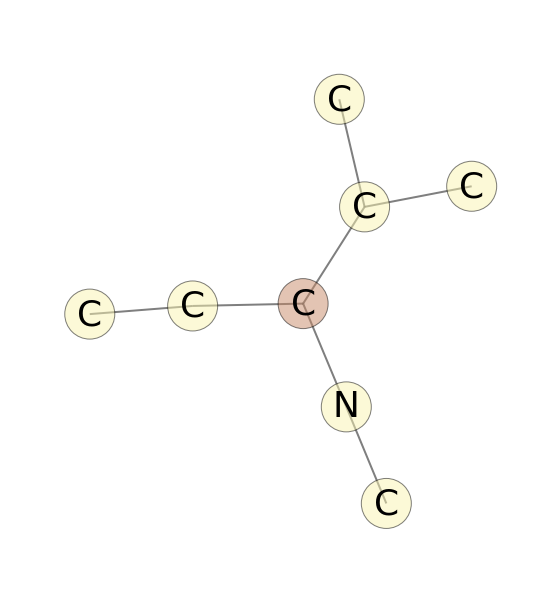

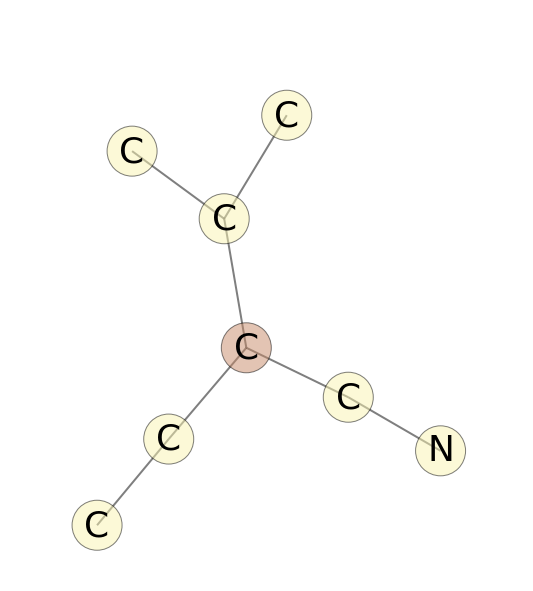

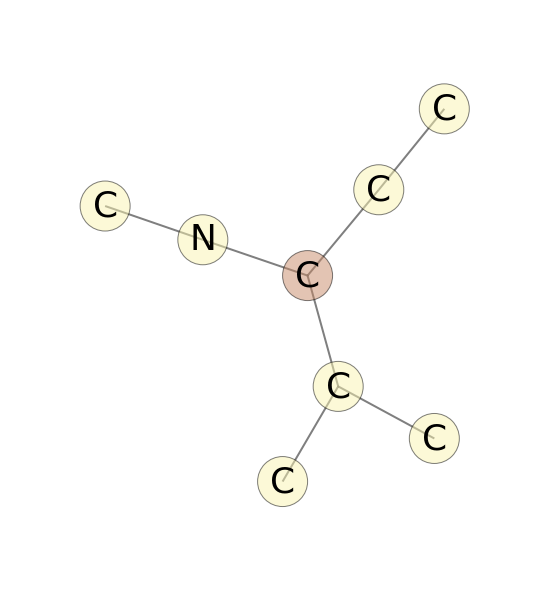

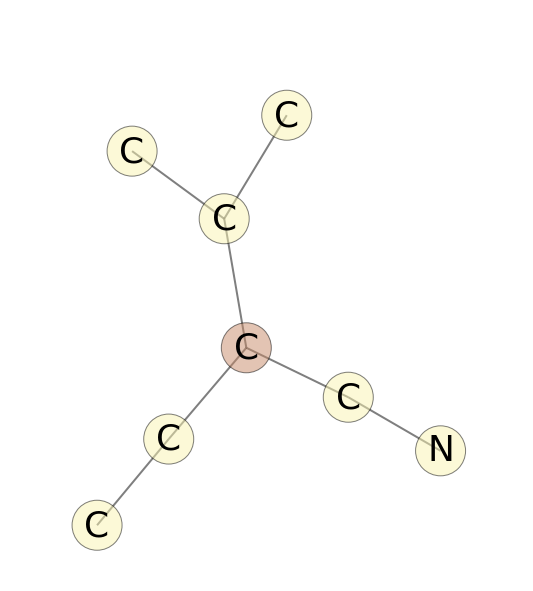

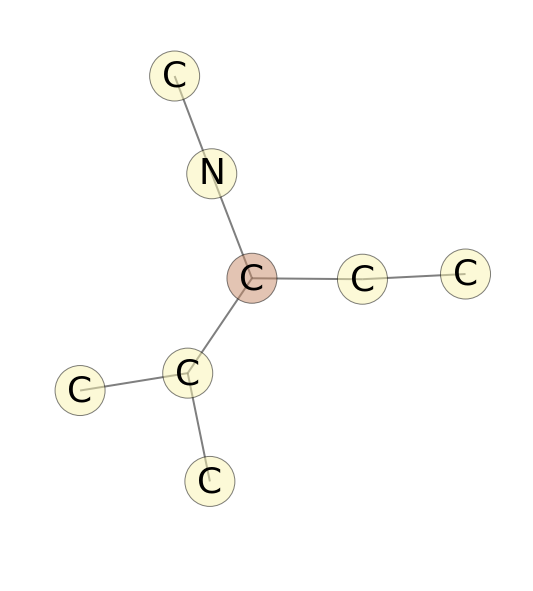

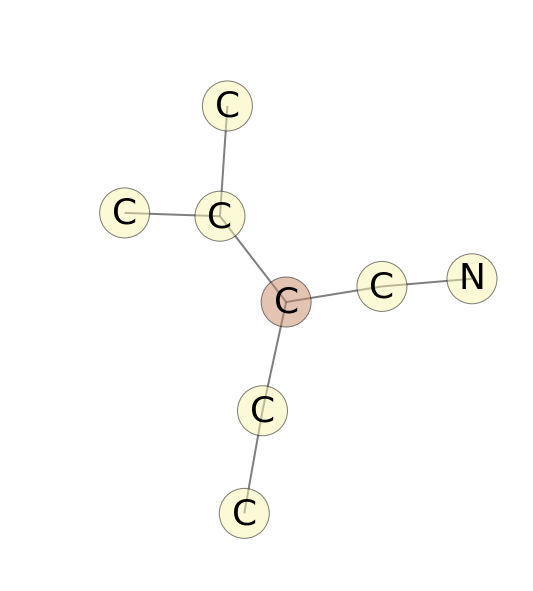

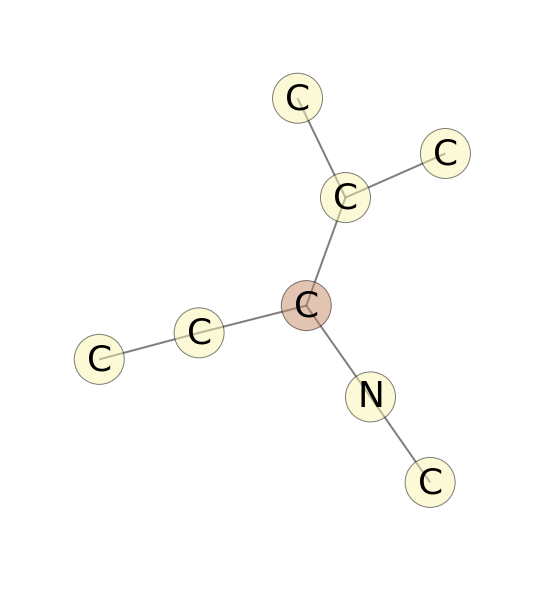

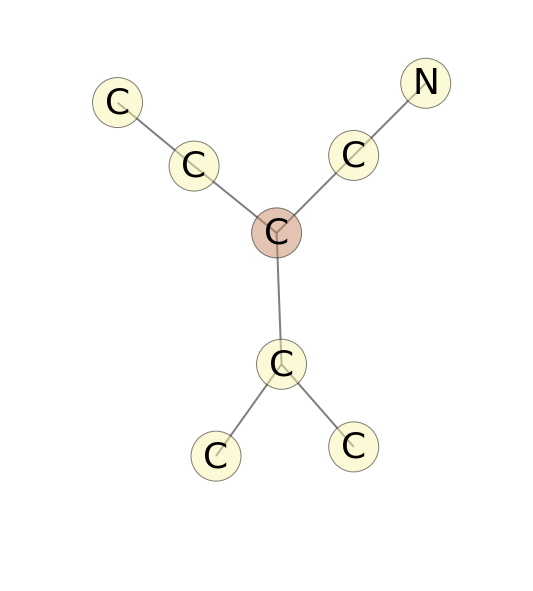

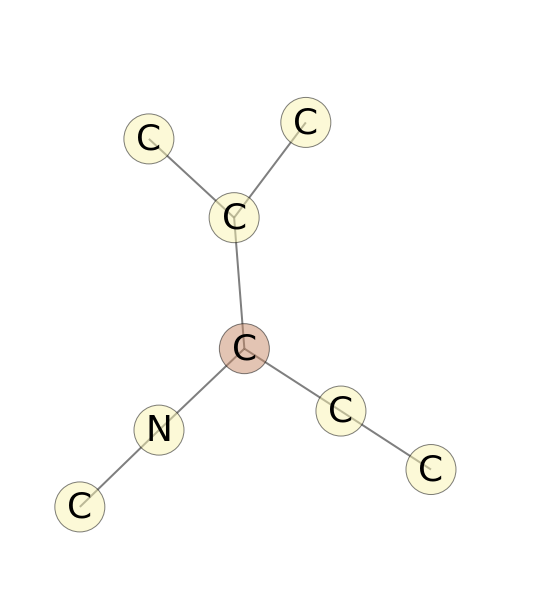

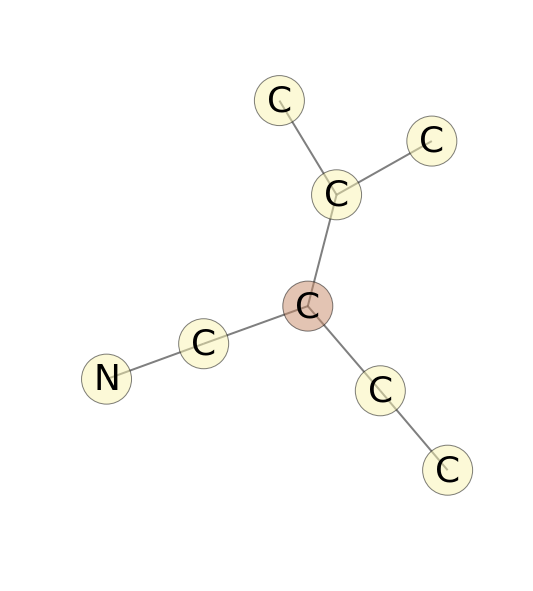

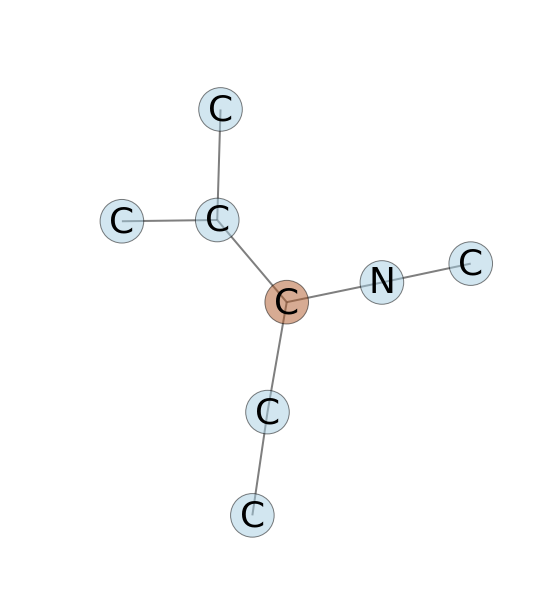

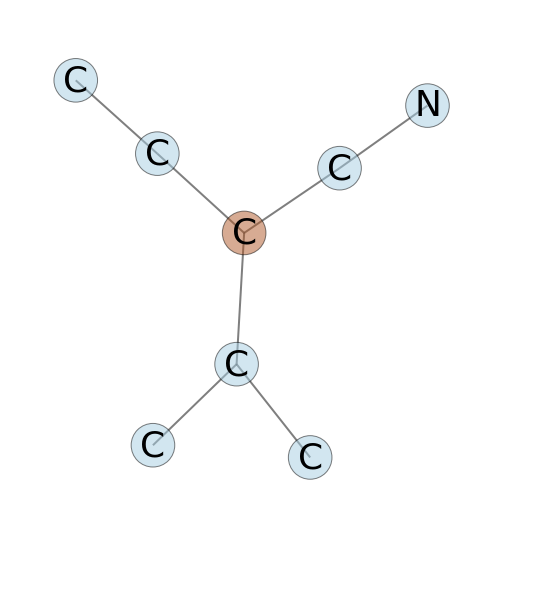

[<networkx.classes.graph.Graph object at 0x7f843484e250>, <networkx.classes.graph.Graph object at 0x7f843484e610>, <networkx.classes.graph.Graph object at 0x7f843484e7d0>, <networkx.classes.graph.Graph object at 0x7f843484ed50>]


'\n# look for a goodbase graph\ngraphs = get_graphs(dataset_fname, size=100)\ng=graphs.next()\ng=graphs.next()\ng=graphs.next()\n#draw.graphlearn(g, size=10,font_size=36, secondary_vertex_label=\'ID\',\n#                   colormap=\'Paired\', invert_colormap=False,node_border=0.5, \n#                   vertex_alpha=0.5, node_size=1900)\n\n\n\n# look 4 good cip\ncips=tools.extract_core_and_interface(6,g,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)\nfor i in range(6):\n    print cips[i]\ngraphs=draw.cip_to_drawable_graph(cips,[g]*len(cips))\n#draw.graphlearn(graphs, n_graphs_per_line=7, size=5,secondary_vertex_label=\'ID\',contract=False,\n#                              colormap=\'Paired\', invert_colormap=False,node_border=1,\n#                              vertex_alpha=0.6, edge_alpha=0.2, node_size=450)\n\n\n\n#manipulate cip\ncips[3].graph.node[6][\'label\']=\'N\'\n\n\n#make union \nimport networkx as nx\ng3=nx.union( graphs[3

In [12]:
# nov 23 .. graphlearn examples, grammar ipynb
'''
Demonstrating the filter function
'''

#get a graph
graphs = get_graphs(dataset_fname, size=1)
graph = next(graphs)
import  graphlearn.utils.draw as draw
import  graphlearn.graph as tools
from eden.util import display as edisp
from eden.graph import Vectorizer
vectorizer=Vectorizer()

print 'We work on this graph'
#draw.graphlearn(graph, size=10, secondary_vertex_label='ID',
#                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
#                   vertex_alpha=0.5, node_size=650)

def show(cips):
    graphs=draw.cip_to_drawable_graph(cips)
    draw.graphlearn(graphs, n_graphs_per_line=7, size=5,
                              colormap='Paired', invert_colormap=False,node_border=1,
                              vertex_alpha=0.6, edge_alpha=0.2, node_size=450)
    
radius_list=[0,1,2]
thickness_list=[1,2]
graph.node[1]['no_root']=True
#lets see.. without filter:

cips=tools.extract_core_and_interface(1,graph,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'no filter'
#show(cips)


# lets do the same but with the filter
cips=tools.extract_core_and_interface(1,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter: nothing should appear,,,'
#show(cips)

# filter is ignoring unfiltered things:
cips=tools.extract_core_and_interface(2,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but we chose node 2 as root'
#show(cips)

# no core attribute
graph.node[1]["not_in_core"]=True
graph.node[1].pop('no_root')
cips=tools.extract_core_and_interface(2,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up'
#show(cips)


#thesis 

def colorize_by_type(g,label='mycolors'):

    for n,d in g.nodes(data=True):
        if 'interface' not in d:
            d[label]='#C88A68' #r
        elif 'interface' in d:
            d[label]='#FAF4B0' #y 
        elif 'SHOULDONOTHAPPEN' in d:
            d[label]='#C9BC24' #dark y
        else:
            d[label]='#C1DDEB' #b

        

graphs=draw.cip_to_drawable_graph(cips)
graphs[2].node[3]['label']='C'
g=graphs[2].copy()

g.node[6]['label']="N"
graphs[2].node[11]['label']='N'

         
colorize_by_type(g)
colorize_by_type(graphs[2])


for i in range(10):
    draw.graphlearn(g, size=10,font_size=36,# secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5,  vertex_color='mycolors',file_name=str(i)+'.svg',
                   vertex_alpha=0.5, node_size=2500)


draw.graphlearn(g, size=10,font_size=36, #secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5, 
                   vertex_alpha=0.5, node_size=1900)
draw.graphlearn(graphs[2], size=10,font_size=36,# secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5, 
                   vertex_alpha=0.5, node_size=1900)

print graphs


'''
# look for a goodbase graph
graphs = get_graphs(dataset_fname, size=100)
g=graphs.next()
g=graphs.next()
g=graphs.next()
#draw.graphlearn(g, size=10,font_size=36, secondary_vertex_label='ID',
#                   colormap='Paired', invert_colormap=False,node_border=0.5, 
#                   vertex_alpha=0.5, node_size=1900)



# look 4 good cip
cips=tools.extract_core_and_interface(6,g,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
for i in range(6):
    print cips[i]
graphs=draw.cip_to_drawable_graph(cips,[g]*len(cips))
#draw.graphlearn(graphs, n_graphs_per_line=7, size=5,secondary_vertex_label='ID',contract=False,
#                              colormap='Paired', invert_colormap=False,node_border=1,
#                              vertex_alpha=0.6, edge_alpha=0.2, node_size=450)



#manipulate cip
cips[3].graph.node[6]['label']='N'


#make union 
import networkx as nx
g3=nx.union( graphs[3], cips[3].graph ,rename=('+','-'))

#wire
def wire(g,nset=[]):
    for n in nset:
        z=str(n)
        g.add_edge("+"+z,"-"+z,nesting=True,weight='.2',len=2)
wire(g3,[0,1,2,7,4,9])

for i in range(10):
    draw.graphlearn(g3, size=10,font_size=36, #ignore_for_layout='nesting',
                   colormap='Paired', invert_colormap=False,node_border=0.5, 
                   vertex_alpha=0.5, node_size=1900)

'''

We work on this graph
no filter
with filter: nothing should appear,,,
with filter but we chose node 2 as root
with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up
cip: int:436193, cor:481061, rad:0, thi:1, rot:6
cip: int:303776, cor:918887, rad:1, thi:1, rot:6
cip: int:682461, cor:70912, rad:2, thi:1, rot:6
cip: int:347422, cor:481061, rad:0, thi:2, rot:6
cip: int:206030, cor:918887, rad:1, thi:2, rot:6
cip: int:523708, cor:70912, rad:2, thi:2, rot:6


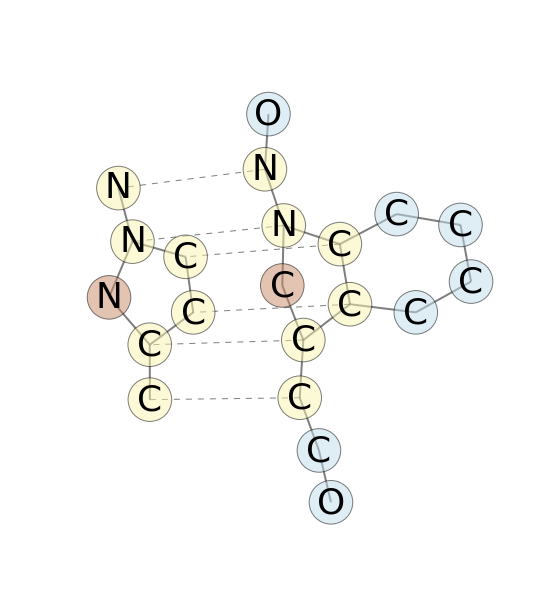

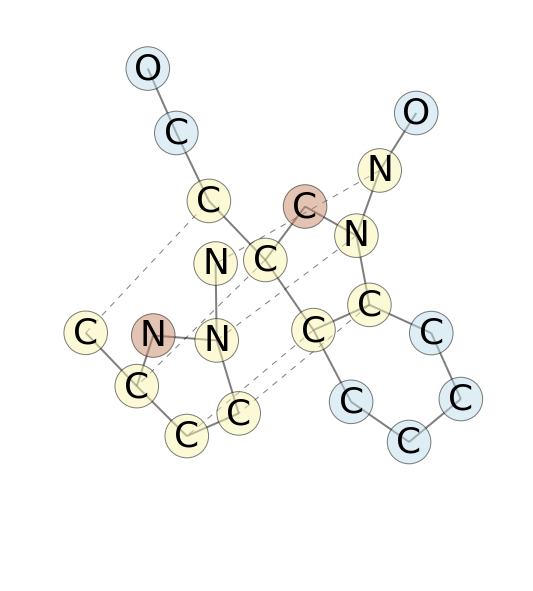

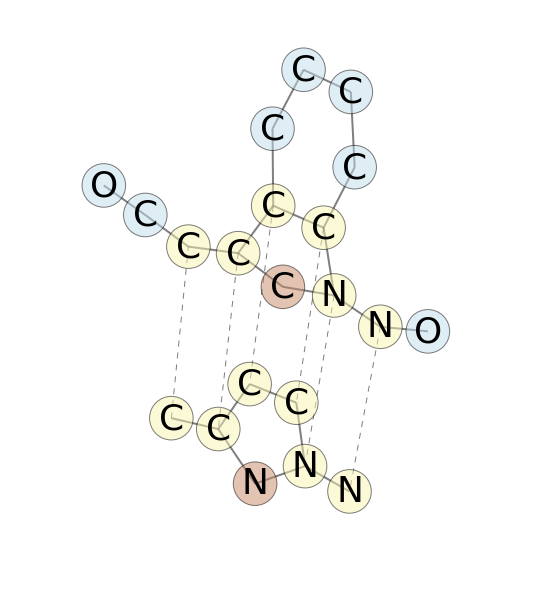

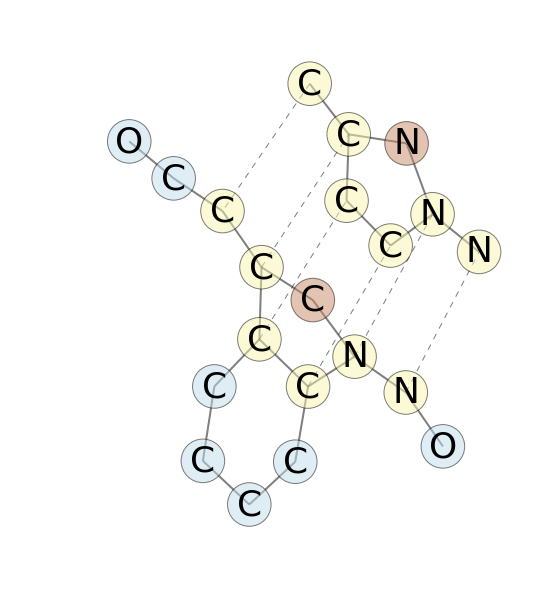

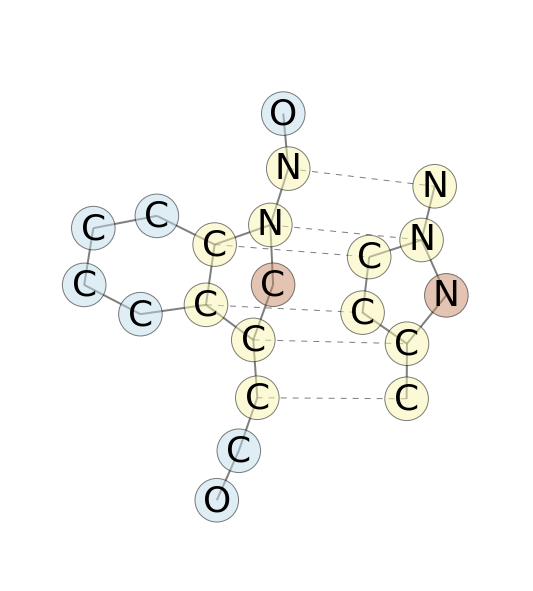

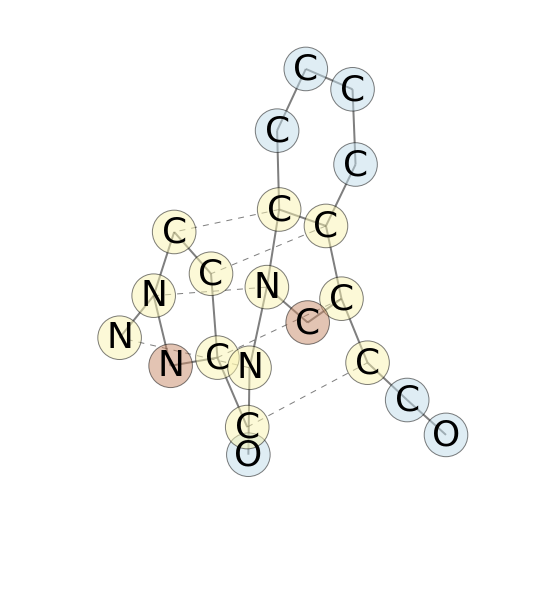

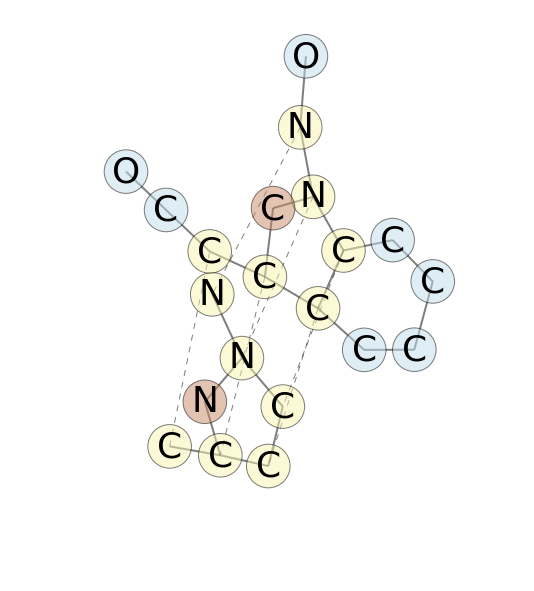

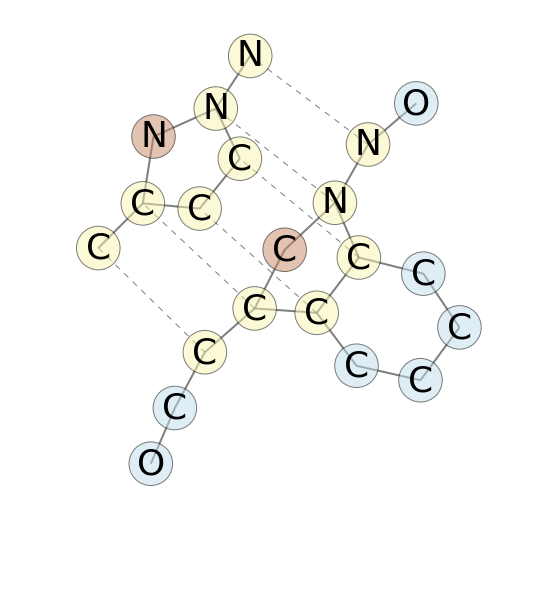

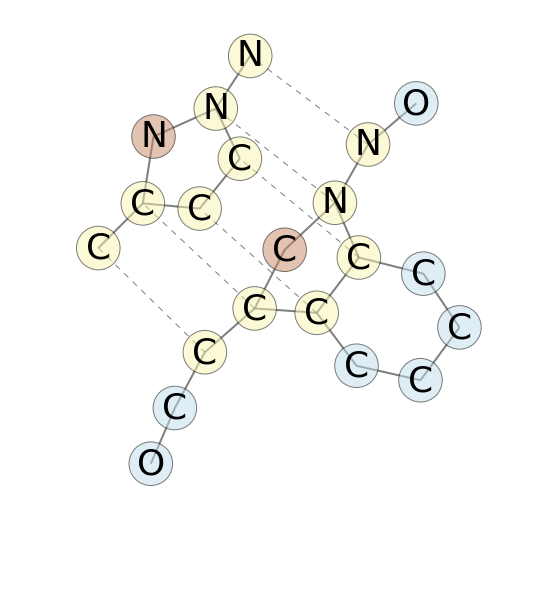

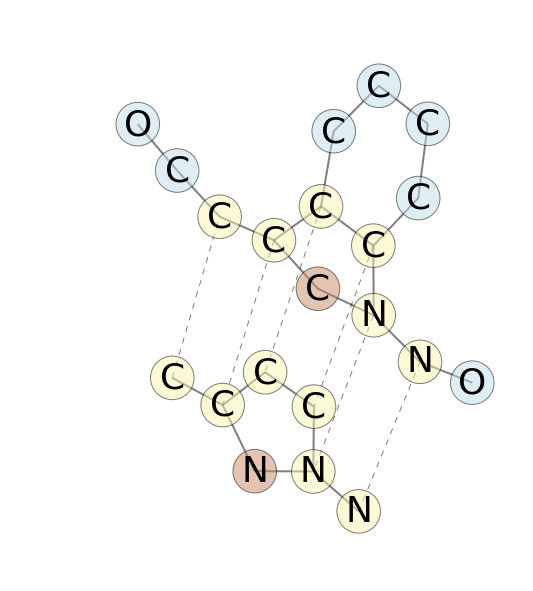

In [4]:
'''
Demonstrating the filter function
'''
#get a graph
graphs = get_graphs(dataset_fname, size=1)
graph = next(graphs)
import  graphlearn.utils.draw as draw
import  graphlearn.graph as tools

print 'We work on this graph'
#draw.graphlearn(graph, size=10, secondary_vertex_label='ID',
#                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='_labels_',
#                   vertex_alpha=0.5, node_size=650)

def show(cips):
    graphs=draw.cip_to_drawable_graph(cips)
    draw.graphlearn(graphs, n_graphs_per_line=7, size=5,
                              colormap='Paired', invert_colormap=False,node_border=1,
                              vertex_alpha=0.6, edge_alpha=0.2, node_size=450)
    
radius_list=[0,1,2]
thickness_list=[1,2]
graph.node[1]['no_root']=True
#lets see.. without filter:

cips=tools.extract_core_and_interface(1,graph,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'no filter'
#show(cips)


# lets do the same but with the filter
cips=tools.extract_core_and_interface(1,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter: nothing should appear,,,'
#show(cips)

# filter is ignoring unfiltered things:
cips=tools.extract_core_and_interface(2,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but we chose node 2 as root'
#show(cips)

# no core attribute
graph.node[1]["not_in_core"]=True
graph.node[1].pop('no_root')
cips=tools.extract_core_and_interface(2,graph,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
print 'with filter but node "1" cant be part of a core, we gave 0 and 2 as radius list and only radius 2 will show up'
#show(cips)


#thesis 
'''
graphs=draw.cip_to_drawable_graph(cips)
g=graphs[2].copy()
g.node[0]['label']="N"
g.node[3]['label']="C"
draw.graphlearn([graphs[2],g], size=10,font_size=36, #secondary_vertex_label='ID',
                   colormap='Paired', invert_colormap=False,node_border=0.5, 
                   vertex_alpha=0.5, node_size=1900)

print graphs
'''


# look for a goodbase graph
graphs = get_graphs(dataset_fname, size=100)
g=graphs.next()
g=graphs.next()
g=graphs.next()
#draw.graphlearn(g, size=10,font_size=36, secondary_vertex_label='ID',
#                   colormap='Paired', invert_colormap=False,node_border=0.5, 
#                   vertex_alpha=0.5, node_size=1900)



# look 4 good cip
cips=tools.extract_core_and_interface(6,g,node_filter=tools.filter,radius_list=radius_list,thickness_list=thickness_list,vectorizer=vectorizer)
for i in range(6):
    print cips[i]
graphs=draw.cip_to_drawable_graph(cips,[g]*len(cips))
#draw.graphlearn(graphs, n_graphs_per_line=7, size=5,secondary_vertex_label='ID',contract=False,
#                              colormap='Paired', invert_colormap=False,node_border=1,
#                              vertex_alpha=0.6, edge_alpha=0.2, node_size=450)



#manipulate cip
cips[3].graph.node[6]['label']='N'


#set colors
def colorize_by_type(g,label='mycolors'):
    for n,d in g.nodes(data=True):
        if 'interface' not in d:
            d[label]='#C88A68' #r
        elif 'interface' in d:
            d[label]='#FAF4B0' #y 
        elif 'SHOULDONOTHAPPEN' in d:
            d[label]='#C9BC24' #dark y
        else:
            d[label]='#C1DDEB' #b

            
colorize_by_type(cips[3].graph)

for n,d in cips[3].graph.nodes(data=True):
    graphs[3].node[n]['mycolors']=d['mycolors']
         
for n,d in graphs[3].nodes(data=True):
    if n in cips[3].graph.nodes():
        graphs[3].node[n]['mycolors']=cips[3].graph.node[n]['mycolors']
    else:
        graphs[3].node[n]['mycolors']='#C1DDEB'

        
#make union 
import networkx as nx
g3=nx.union( graphs[3], cips[3].graph ,rename=('+','-'))

#wire
def wire(g,nset=[]):
    for n in nset:
        z=str(n)
        g.add_edge("+"+z,"-"+z,nesting=True,weight='.2',len=2)
wire(g3,[0,1,2,7,4,9])

for i in range(10):
    draw.graphlearn(g3, size=10,font_size=36, #ignore_for_layout='nesting',
                   colormap='Paired', invert_colormap=False,node_border=0.5, vertex_color='mycolors',
                   vertex_alpha=0.5, node_size=1900)


.

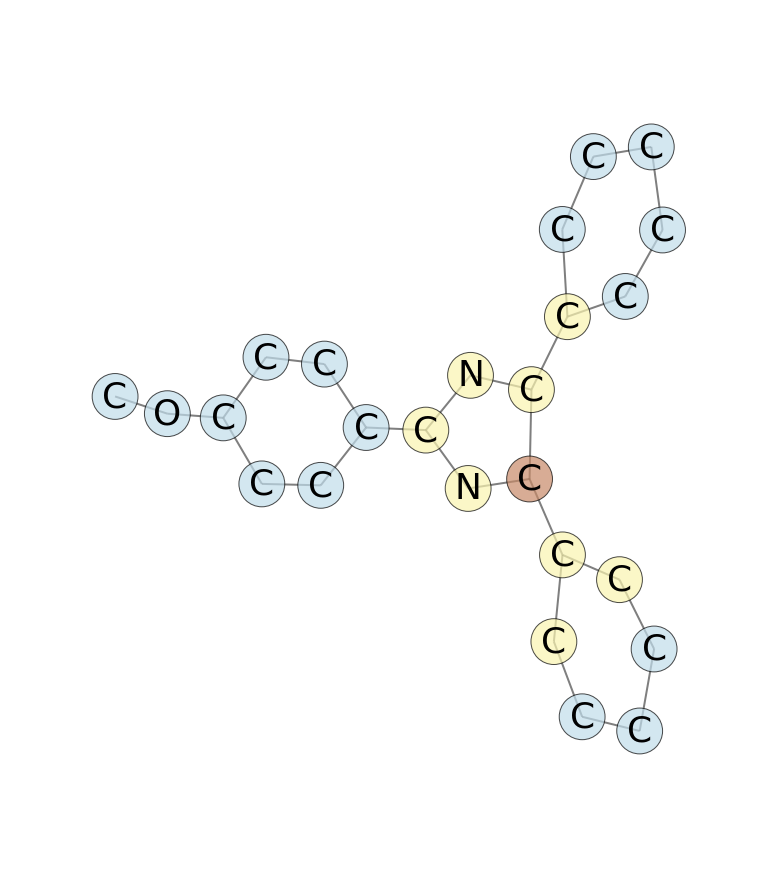

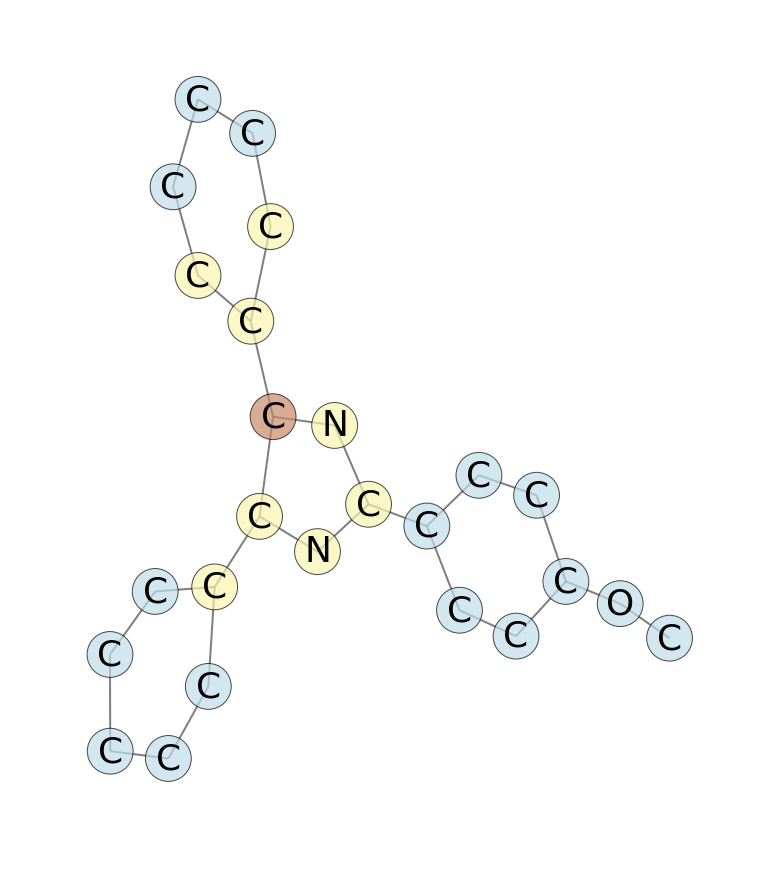

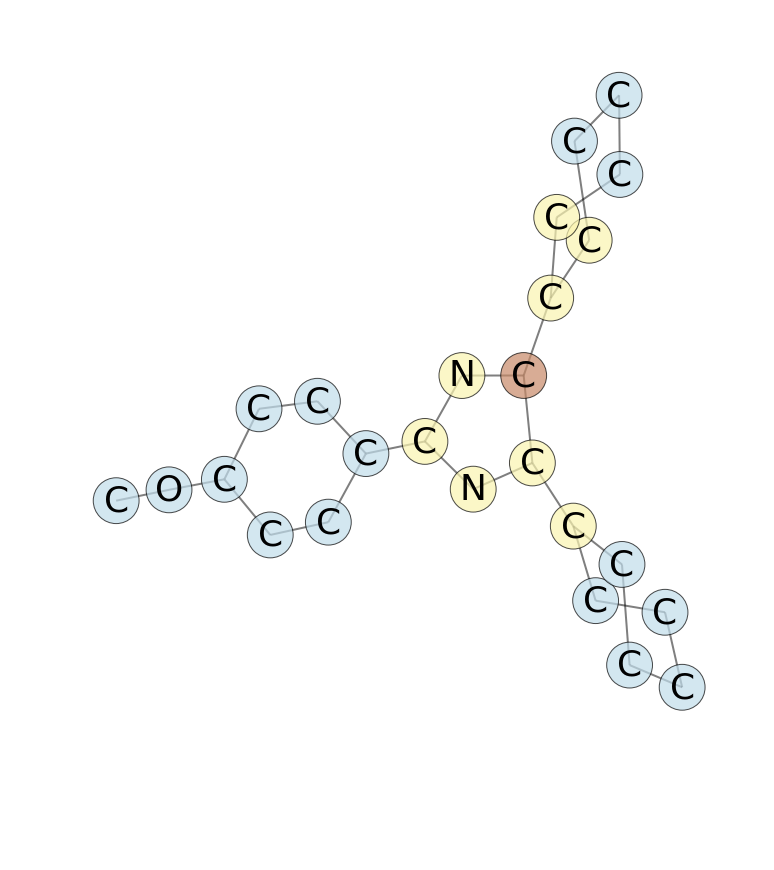

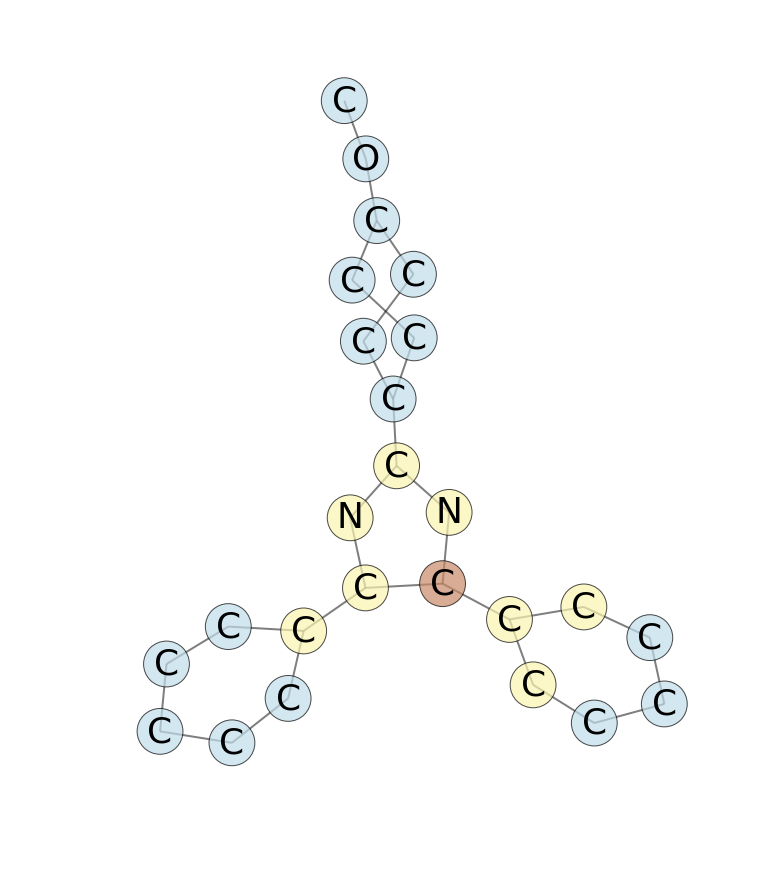

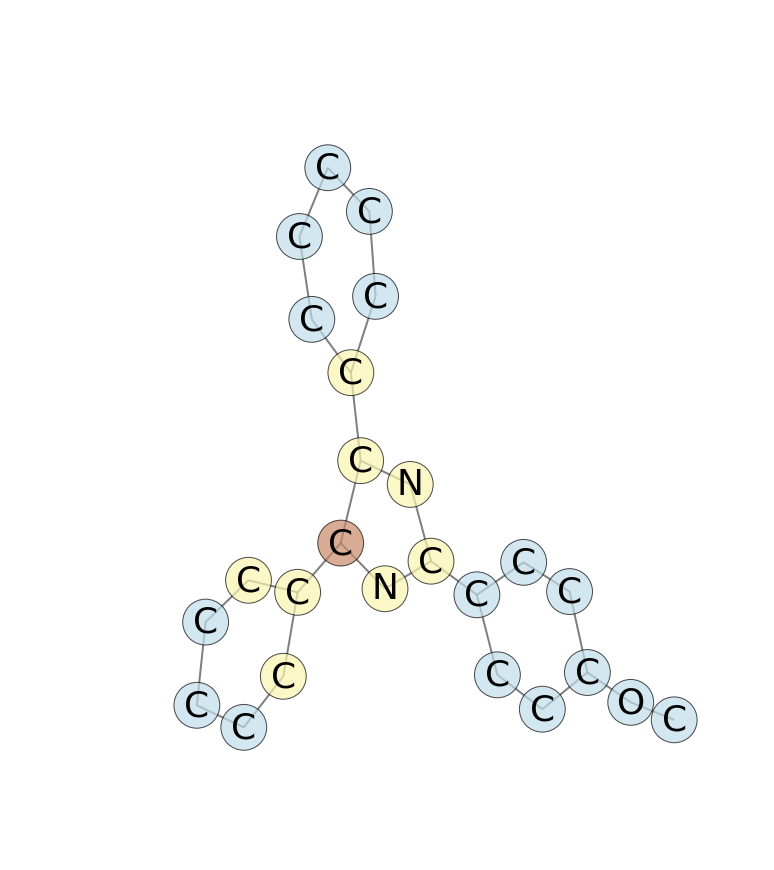

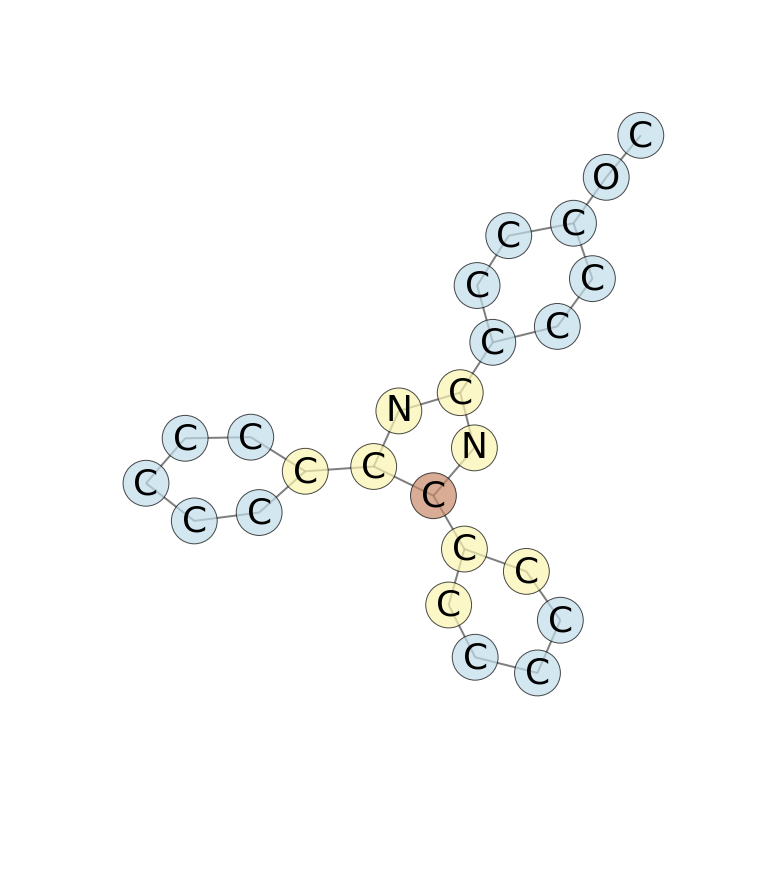

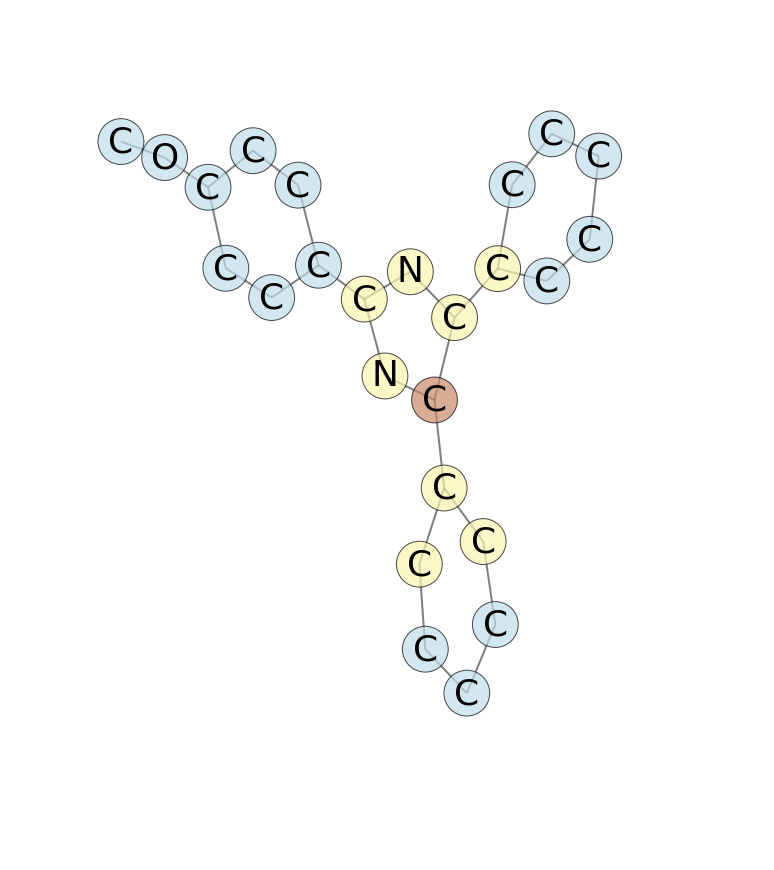

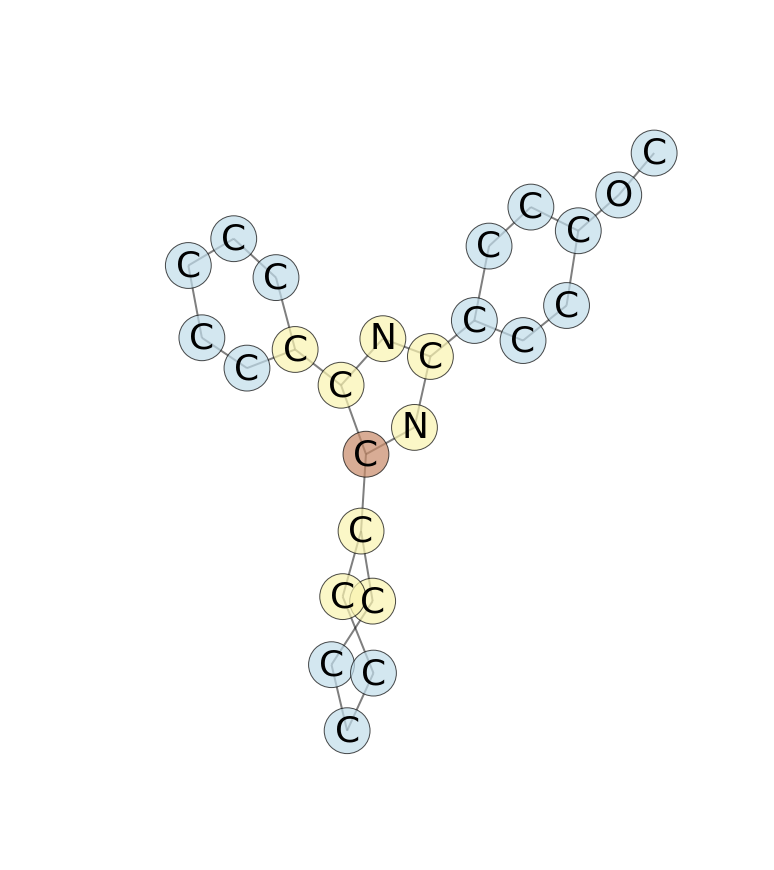

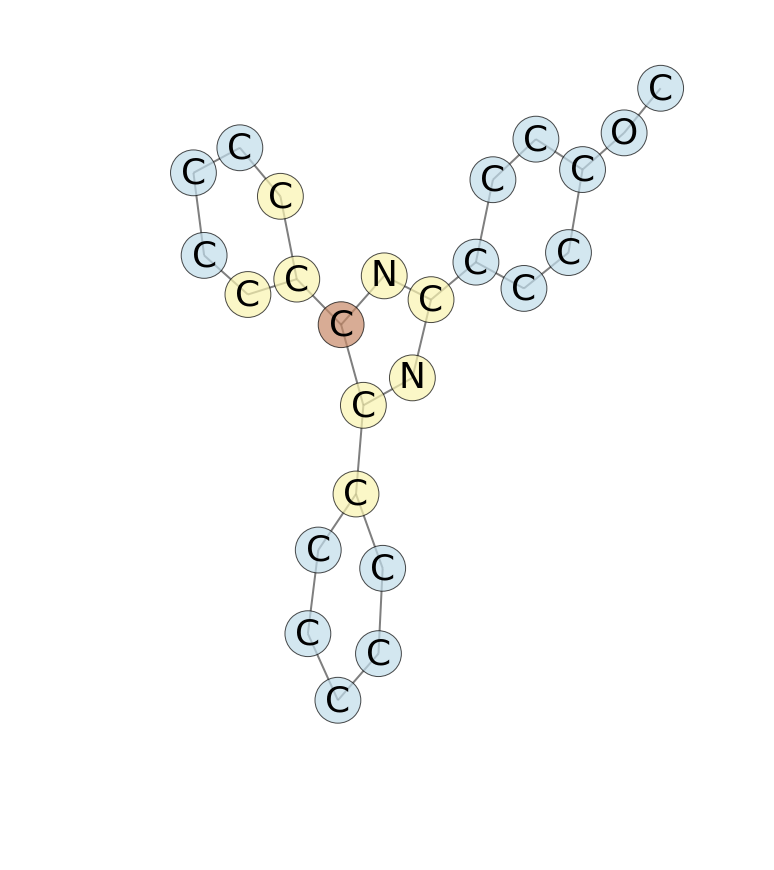

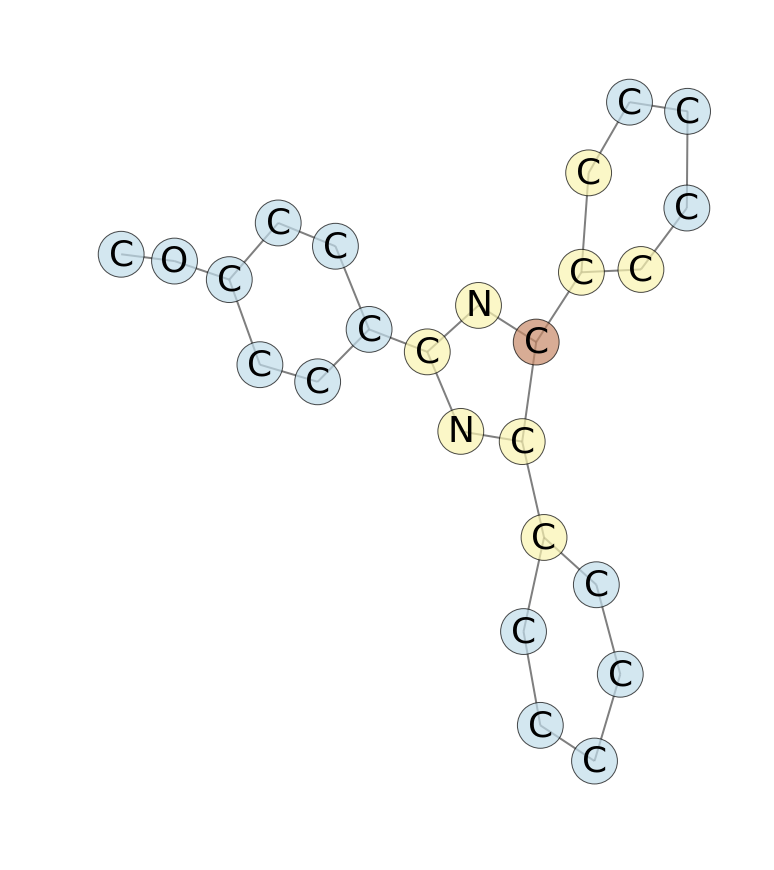

In [22]:


graphs = get_graphs(dataset_fname)
graph = next(graphs)

# test for thesis
def colorize(g,c1=[],c2=[],c3=[],label='mycolors'):
    for n,d in g.nodes(data=True):
        if n in c1:
            d[label]='#C88A68'
        elif n in c2:
            d[label]='#FAF4B0'
        elif n in c3:
            d[label]='#C9BC24'
        else:
            d[label]='#C1DDEB'

colorize(graph,c1=[0,18],c2=[1,2,3,21,13],c3=[])

g2=graph.copy()
colorize(graph,c1=[0],c2=[1,2,3,5,4,6,7,8],c3=[])



for i in range(10):
    draw.graphlearn([graph], size=15, font_size=36, #secondary_vertex_label='ID',
        colormap='Paired', invert_colormap=False, node_border=0.5, vertex_color='mycolors',
        vertex_alpha=0.7, node_size=2100)

